<a href="https://colab.research.google.com/github/umak1106/Sumoylation/blob/main/TAPE_BERT%2BCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install  -r requirements.txt

  Cloning https://github.com/facebookresearch/esm.git to /tmp/pip-req-build-z747urw5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/esm.git /tmp/pip-req-build-z747urw5
  Resolved https://github.com/facebookresearch/esm.git to commit 2b369911bb5b4b0dda914521b9475cad1656b2ac
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 112.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91

In [1]:
!pip install transformers

In [2]:
!pip install tape_proteins

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.9/68.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 13.4 MB/s eta 0:00:00


In [4]:
!pip install pandas
import pandas as pd
train_df = pd.read_csv("data.csv", header=0)
train_df_bert = train_df
train_sentences = train_df_bert.Sequence.values
train_labels = train_df_bert.Label.values

In [8]:
!pip install numpy

In [10]:
import torch
import pandas as pd
import numpy as np
from tape import ProteinBertModel, TAPETokenizer

# Load your CSV file
file_path = 'data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)
model = ProteinBertModel.from_pretrained('bert-base')
tokenizer = TAPETokenizer(vocab='iupac')
w = 32  # Adjust the window size as needed
X_ds = []

for i in range(df.shape[0]):
    # Tokenize the protein sequence
    token_id = torch.tensor([tokenizer.encode(df['Sequence'][i])])

    # Get word embeddings from the model
    output = model(token_id)[0]
    word_embeddings = output[0][1:2*w+2].detach().numpy()

    # Append the word embeddings to the list
    X_ds.append(word_embeddings)

# Stack and reorganize the data
X_ds = np.dstack(X_ds)
X_ds = np.rollaxis(X_ds, -1)

# Display the resulting word embeddings
print(X_ds)


<ipython-input-10-d8da34c4de43>:16: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  token_id = torch.tensor([tokenizer.encode(df['Sequence'][i])])


[[[ 0.72015065 -1.3986554  -0.30141127 ...  0.47341195 -0.47461015
   -1.0559108 ]
  [ 0.17397618 -0.6054338   0.62346995 ... -0.12752336 -0.70675755
   -1.9100679 ]
  [-0.09148215 -1.4402717  -0.34626532 ... -0.77565306  0.56873184
   -0.6449263 ]
  ...
  [-1.8503522   0.47556108 -0.83833843 ... -0.19482899 -0.64081335
   -0.83072716]
  [ 0.05194956 -0.82395226  0.19438279 ... -0.40544963 -0.34206414
    0.15881555]
  [-0.24026805 -0.26628324 -1.038904   ...  0.6049342  -1.6227597
   -0.4684231 ]]

 [[ 0.11152747 -1.7397149   0.15212119 ...  0.4448657   0.97327816
   -0.4709488 ]
  [-0.0350074  -2.0241694  -0.37026823 ...  1.0091677   0.14092602
   -1.1005567 ]
  [ 0.6414089  -0.9245552  -0.16198127 ...  1.0198326  -0.5326997
   -0.47883713]
  ...
  [-0.46484125 -1.4081808  -0.31921092 ...  0.27822703 -0.6188026
   -1.2135645 ]
  [-0.2713851  -1.3666011   0.7083491  ...  0.5472199  -0.22488317
   -0.46880788]
  [-0.31827617 -0.58063996 -0.8191733  ...  0.5232028  -1.3762023
   -0.5118

In [11]:
!pip install tensorflow
!pip install pytorch_lightning
!pip install SentencePiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.0 MB/s eta 0:00:00


In [ ]:
X_train = X_ds
X_valid = X_ds


In [19]:
import torch
import pandas as pd
import numpy as np
from tape import ProteinBertModel, TAPETokenizer
from sklearn.model_selection import train_test_split

# Load your CSV file
file_path = 'data.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Assuming 'Sequence' is the column containing protein sequences, and 'Label' is the target column
X = df['Sequence']
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model and tokenizer
model = ProteinBertModel.from_pretrained('bert-base')
tokenizer = TAPETokenizer(vocab='iupac')
w = 32  # Adjust the window size as needed
X_train_ds = []

# Embedding process for training data
for i in range(X_train.shape[0]):
    # Tokenize the protein sequence
    token_id = torch.tensor([tokenizer.encode(X_train.iloc[i])])

    # Get word embeddings from the model
    output = model(token_id)[0]
    word_embeddings = output[0][1:2 * w + 2].detach().numpy()

    # Append the word embeddings to the list
    X_train_ds.append(word_embeddings)

# Stack and reorganize the data
X_train_ds = np.dstack(X_train_ds)
X_train_ds = np.rollaxis(X_train_ds, -1)

# Display the resulting word embeddings for training data
print(X_train_ds)



[[[-6.4364952e-01 -1.7254419e+00  1.0808032e+00 ...  5.8686352e-01
    5.7147640e-01 -9.0267473e-01]
  [-3.3305570e-01 -1.6078819e+00  9.1328192e-01 ... -7.1375579e-01
    1.7199039e+00 -6.3036579e-01]
  [-5.8058661e-01 -6.9997376e-01  1.3243484e+00 ...  4.4273776e-01
   -5.2244312e-01 -2.3011816e+00]
  ...
  [-6.8090367e-01 -1.0790181e+00 -6.3704360e-01 ... -3.6899993e-01
   -9.7457492e-01 -1.4437270e+00]
  [ 1.2697263e+00 -1.0271461e+00  4.5026171e-01 ...  2.3314101e-01
   -4.5416301e-01 -5.4621959e-01]
  [-1.4097834e-01 -3.1023085e-01 -6.5230143e-01 ...  3.8147202e-01
   -1.4577290e+00 -6.9204873e-01]]

 [[ 3.4658790e-01 -1.1432242e+00  9.5442033e-01 ... -9.4865352e-02
   -4.7060716e-01 -2.3859386e+00]
  [ 4.8964840e-01 -1.1985205e+00  8.2546395e-01 ... -5.3226745e-01
   -3.6134529e-01 -2.2594922e+00]
  [ 2.1195656e-01 -1.9406472e+00  8.2091987e-02 ... -1.2683886e+00
    2.0416902e-01 -1.2567284e+00]
  ...
  [ 1.2838854e-01 -1.2547132e+00 -9.1287589e-01 ...  5.6080985e-01
    5.1255

In [24]:
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
import os
import logging
from configparser import ConfigParser

logger = logging.getLogger(__name__)

def CNNModel(X_train, Y_train, X_valid, Y_valid, embedding_input_shape, config_file='CNN_config.ini'):
    # Load configuration from the specified INI file
    parser = ConfigParser(os.environ)
    if not os.path.exists(config_file):
        raise IOError("Configuration file '%s' does not exist" % config_file)
    logging.info('Loading config from %s', config_file)
    parser.read(config_file)
    config_header = 'CNN'

    logger.info('config header: %s', config_header)

    # Retrieve hyperparameters from the configuration file
    filters = parser.getint(config_header, 'filters')
    kernels = parser.getint(config_header, 'kernels')
    dense_layers1 = parser.getint(config_header, 'dense_layers1')
    dense_layers2 = parser.getint(config_header, 'dense_layers2')
    Learning_Rate = parser.getfloat(config_header, 'Learning_Rate')
    dropout = parser.getfloat(config_header, 'dropout')
    Batch_size = parser.getint(config_header, 'Batch_size')
    Epochs = parser.getint(config_header, 'Epochs')
    earlystop = parser.getboolean(config_header, 'earlystop')

    # Define the model input shape based on the protein embeddings
    inputs = keras.Input(shape=embedding_input_shape, dtype="float32")

    kmodel = keras.models.Sequential()
    kmodel.add(layers.Reshape(input_shape=embedding_input_shape, target_shape=embedding_input_shape))
    kmodel.add(layers.Conv1D(filters, kernel_size=kernels, padding='same', batch_input_shape=(None, *embedding_input_shape)))
    kmodel.add(layers.BatchNormalization(name="conv_1_bn"))
    kmodel.add(layers.ReLU(name="conv_1_relu"))

    kmodel.add(layers.Flatten())
    kmodel.add(layers.Dense(dense_layers1, activation='relu'))
    kmodel.add(layers.Dense(dense_layers2, kernel_regularizer=keras.regularizers.l2(0.001),
                            activity_regularizer=keras.regularizers.l1(0.001)))
    kmodel.add(layers.Activation('relu'))
    kmodel.add(layers.Dropout(dropout))
    kmodel.add(layers.Dense(1, activation='sigmoid'))
    opt = keras.optimizers.Adam(learning_rate=Learning_Rate)
    kmodel.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=opt)
    callback1 = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=8, restore_best_weights=True)
    if earlystop:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid),
                   callbacks=[callback1])
    else:
        kmodel.fit(X_train, Y_train, batch_size=Batch_size, epochs=Epochs, validation_data=(X_valid, Y_valid))

    return kmodel



# Modify the input shape based on the dimensions of your protein embeddings
model_input_shape = X_train_ds.shape[1:]

# Call your CNNModel function
model = CNNModel(X_train_ds, y_train, X_train_ds, y_train, embedding_input_shape=model_input_shape)
model.save('BertCNN.h5')


Epoch 1/100
94/94 [==============================] - 6s 43ms/step - loss: 0.7448 - accuracy: 0.5682 - val_loss: 0.6770 - val_accuracy: 0.6467
Epoch 2/100
94/94 [==============================] - 2s 21ms/step - loss: 0.6622 - accuracy: 0.6350 - val_loss: 0.6086 - val_accuracy: 0.6859
Epoch 3/100
94/94 [==============================] - 2s 21ms/step - loss: 0.6011 - accuracy: 0.6831 - val_loss: 0.5079 - val_accuracy: 0.7586
Epoch 4/100
94/94 [==============================] - 3s 29ms/step - loss: 0.5328 - accuracy: 0.7389 - val_loss: 0.4209 - val_accuracy: 0.8152
Epoch 5/100
94/94 [==============================] - 2s 23ms/step - loss: 0.4566 - accuracy: 0.7847 - val_loss: 0.3500 - val_accuracy: 0.8452
Epoch 6/100
94/94 [==============================] - 1s 16ms/step - loss: 0.3773 - accuracy: 0.8330 - val_loss: 0.2480 - val_accuracy: 0.9095
Epoch 7/100
94/94 [==============================] - 2s 17ms/step - loss: 0.2789 - accuracy: 0.8932 - val_loss: 0.1954 - val_accuracy: 0.9294
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
from sklearn.metrics import roc_auc_score, accuracy_score

# Assuming you already have the trained model 'model' and test data 'X_test_ds'
# Initialize the model and tokenizer
model = ProteinBertModel.from_pretrained('bert-base')
tokenizer = TAPETokenizer(vocab='iupac')
w = 32  # Adjust the window size as needed

# Tokenize and embed the test data
X_test_ds = []
for i in range(X_test.shape[0]):
    token_id = torch.tensor([tokenizer.encode(X_test.iloc[i])])
    output = model(token_id)[0]
    word_embeddings = output[0][1:2 * w + 2].detach().numpy()
    X_test_ds.append(word_embeddings)

# Stack and reorganize the data
X_test_ds = np.dstack(X_test_ds)
X_test_ds = np.rollaxis(X_test_ds, -1)




In [32]:
from keras.models import load_model
model = load_model('BertCNN.h5')
# Predict on the test data
y_pred = model.predict(X_test_ds)

# Convert the probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred_binary)

# Print the results
print(f'AUC: {auc}')
print(f'Accuracy: {acc}')

47/47 [==============================] - 1s 7ms/step
AUC: 0.6831706124679172
Accuracy: 0.6273458445040214


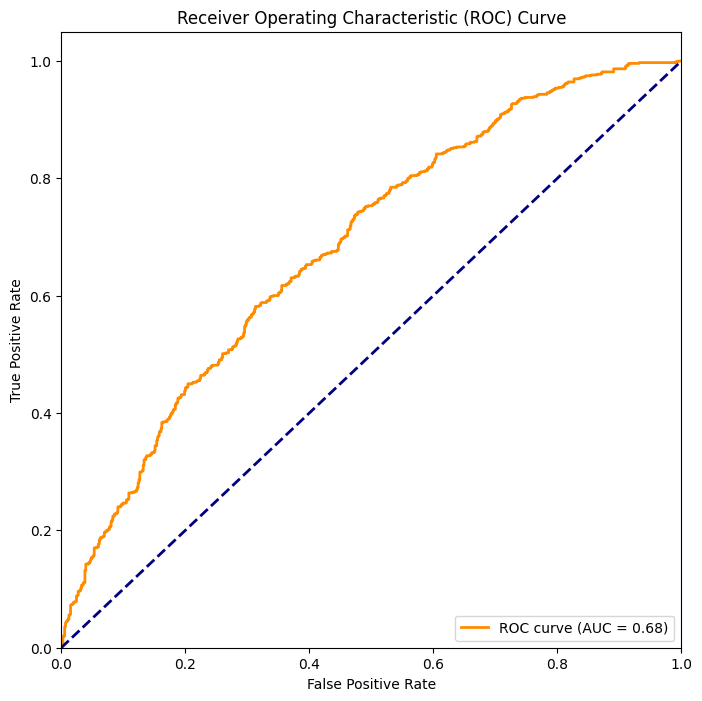

AUC: 0.6831706124679172
Accuracy: 0.6273458445040214


In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you already have the true labels 'y_test' and predicted probabilities 'y_pred'
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Display AUC and accuracy values
print(f'AUC: {roc_auc}')
print(f'Accuracy: {acc}')
